# **Desafio de Classificação:**

**Nome:** Gustavo Bartholomeu Trad Souza

**Nº USP:** 11219216

**Disciplina:** SCC0277 - Competições de Ciências de Dados

**Docente:** Fernando Pereira dos Santos

**Universidade de São Paulo (USP)**

Utilizando a metodologia básica de um projeto para ciência de dados, implemente possíveis soluções para o seguinte estudo de caso (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?resource=download). Desenvolva e implemente métodos que se propõem a responder a questão: **Será que um hóspede irá cancelar sua reserva?**

Em seu projeto deverá constar uma análise detalhada do dataset e descrição das transformações de dados realizadas com suas respectivas justificativas. Adicionalmente, crie um baseline com as técnicas contidas nesta aula. Como forma de superar este baseline, pesquise por métodos e técnicas mais complexas. Você deverá entregar um relatório com os seguintes itens:

1. Descrição do problema e análise dos dados
2. Descrição das técnicas utilizadas
3. Interpretação dos resultados obtidos
4. Conclusão
5. Apêndice (descrição das técnicas de Classificação apresentadas pelos colegas durante os seminários)

In [ ]:
# Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix

import math

np.random.seed(seed=42)

---
## **1. Descrição do problema e análise dos dados**

Os canais online de reserva de hotéis mudaram drasticamente as possibilidades de reserva e o comportamento dos clientes em relação à reserva de vagas. Um número significativo de reservas em hotéis é cancelado e os motivos típicos para cancelamentos incluem mudança de planos, conflitos de agendamento, etc. Uma forma de evitar grandes despesas por parte dos hotéis é tentar prever a possibilidade do cancelamento de acordo com informações fornecidas durante a reserva, dessa forma, quando um cliente 

### Descrição dos dados

O dataset é estruturado e é composto de 19 colunas com informações sobre reservas realizadas por clientes e algumas informações sobre o cliente que realizou a reserva. As colunas do dataset são:

* **Booking_ID:** Identificador único de cada reserva.
* **no_of_adults:** Quantidade de adultos.
* **no_of_children:** Quantidade de crianças.
* **no_of_weekend_nights:** Quantidade de noites de fim de semana (sábado ou domingo) que o hóspede reservou.
* **no_of_week_nights:** Quantidade de noites de dias de semana (segunda a sexta) que o hóspede reservou.
* **type_of_meal_plan:** Tipo de plano de refeição reservado pelo cliente.
* **required_car_parking_space:** Necessita de vaga no estacionamento? *(0-Não, 1-Sim)*.
* **room_type_reserved:** Tipo de quarto reservado pelo cliente. Os valores são cifrados (codificados) pela INN Hotels.
* **lead_time:** Quantidade de dias entre a data da reserva e a data de chegada.
* **arrival_year:** Ano da reserva.
* **arrival_month:** Mês da reserva.
* **arrival_date:** Dia do mês da reserva.
* **market_segment_type:** Designação do segmento de mercado.
* **repeated_guest:** O cliente ja se hospedou no hotel antes? *(0-Não, 1-Sim)*.
* **no_of_previous_cancellations:** Número de reservas anteriores que foram canceladas pelo cliente antes da reserva atual.
* **no_of_previous_bookings_not_canceled:** Número de reservas anteriores que não foram canceladas pelo cliente antes da reserva atual.
* **avg_price_per_room:** Preço médio por dia da reserva; os preços dos quartos são dinâmicos. *(em euros)*.
* **no_of_special_requests:** Número total de solicitações especiais feitas pelo cliente *(por exemplo, número do andar, vista do quarto, etc.)*.
* **booking_status:** Flag indicando se a reserva foi cancelada ou não.

In [ ]:
data = pd.read_csv('hotel_reservations.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Atributos quantitativos e categóricos

O dataset possui 36275 entradas distintas e **sem valores faltantes** com informações de reservas realizadas por clientes em diferentes hotéis. Dos 19 atributos presentes na tabela, 11 são quantitativos, sendo eles: **no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, arrival_month, arrival_date, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests** e 6 atributos qualitativos, sendo eles: **type_of_meal_plan, required_car_parking_space, room_type_reserved, market_segment_type, repeated_guest e booking_status**. O atributo de identificação **Booking_ID** não é elevado em conta pois identifica univocadamente cada entrada da tabela e, portanto, não traz informações relevantes para a análise dos dados. O atributo **arrival_year** também será removido pois não traz informações que permitam prever o cancelamento de uma reserva uma vez que não se repete em dados futuros (de outros anos). O atributo binário **booking_status** é o atributo alvo que deve ser predito pelos algorpitmos de classificação que serão utilizados. Cada um dos atributo qualitativos possuem o seguinte número de valores únicos:

In [ ]:
data = data.drop(columns=['Booking_ID', 'arrival_year'])
print('Numero de valores faltantes: \n')
data.isna().sum()

Numero de valores faltantes: 



no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# colunas quantitativas
quant = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 
         'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'arrival_month', 'arrival_date',]

# colunas categóricas
categ = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# colunas binárias
bin_vars = ['required_car_parking_space', 'repeated_guest']

# valor alvo
target = ['booking_status']

print('Número de valores únicos nas colunas qualitativas:\n')
for col in categ + bin_vars+ target:
    print(col, ':', data[col].nunique())
    print('\t', data[col].unique(), '\n')


Número de valores únicos nas colunas qualitativas:

type_of_meal_plan : 4
	 ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3'] 

room_type_reserved : 7
	 ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'] 

market_segment_type : 5
	 ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary'] 

required_car_parking_space : 2
	 [0 1] 

repeated_guest : 2
	 [0 1] 

booking_status : 2
	 ['Not_Canceled' 'Canceled'] 



### Correlação entre atributos quantitativos

In [ ]:
max_corr = 0.8 # valor de correlação máxima

corr = data[quant].corr()
matrizSuperior = np.triu(np.ones(corr.shape),k=1).astype(bool)
correlacaoSuperior = corr.where(matrizSuperior)
atributos = [col for col in correlacaoSuperior.columns if any(abs(correlacaoSuperior[col]) >= max_corr)]
print("Atributos quantitativos com alta correlação:")
print(atributos)


Atributos quantitativos com alta correlação:
[]


In [ ]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-6-ce9744728a5b>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date
no_of_adults,1.00,-0.02,0.10,0.11,0.10,-0.05,-0.12,0.30,0.19,0.02,0.03
no_of_children,-0.02,1.00,0.03,0.02,-0.05,-0.02,-0.02,0.34,0.12,-0.00,0.03
no_of_weekend_nights,0.10,0.03,1.00,0.18,0.05,-0.02,-0.03,-0.00,0.06,-0.01,0.03
no_of_week_nights,0.11,0.02,0.18,1.00,0.15,-0.03,-0.05,0.02,0.05,0.04,-0.01
lead_time,0.10,-0.05,0.05,0.15,1.00,-0.05,-0.08,-0.06,-0.10,0.14,0.01
no_of_previous_cancellations,-0.05,-0.02,-0.02,-0.03,-0.05,1.00,0.47,-0.06,-0.00,-0.04,-0.01
no_of_previous_bookings_not_canceled,-0.12,-0.02,-0.03,-0.05,-0.08,0.47,1.00,-0.11,0.03,-0.01,-0.00
avg_price_per_room,0.30,0.34,-0.00,0.02,-0.06,-0.06,-0.11,1.00,0.18,0.05,0.02
no_of_special_requests,0.19,0.12,0.06,0.05,-0.10,-0.00,0.03,0.18,1.00,0.11,0.02
arrival_month,0.02,-0.00,-0.01,0.04,0.14,-0.04,-0.01,0.05,0.11,1.00,-0.04


Os atributos quantitativos possuem uma correlação muito baixa, sendo a maior correlação entre os atributos **no_of_previous_cancellations** e **no_of_previous_bookings_not_canceled** com o valor de 0.468147, portanto todos os valores serão mantidos.

### Balanceamento dos dados

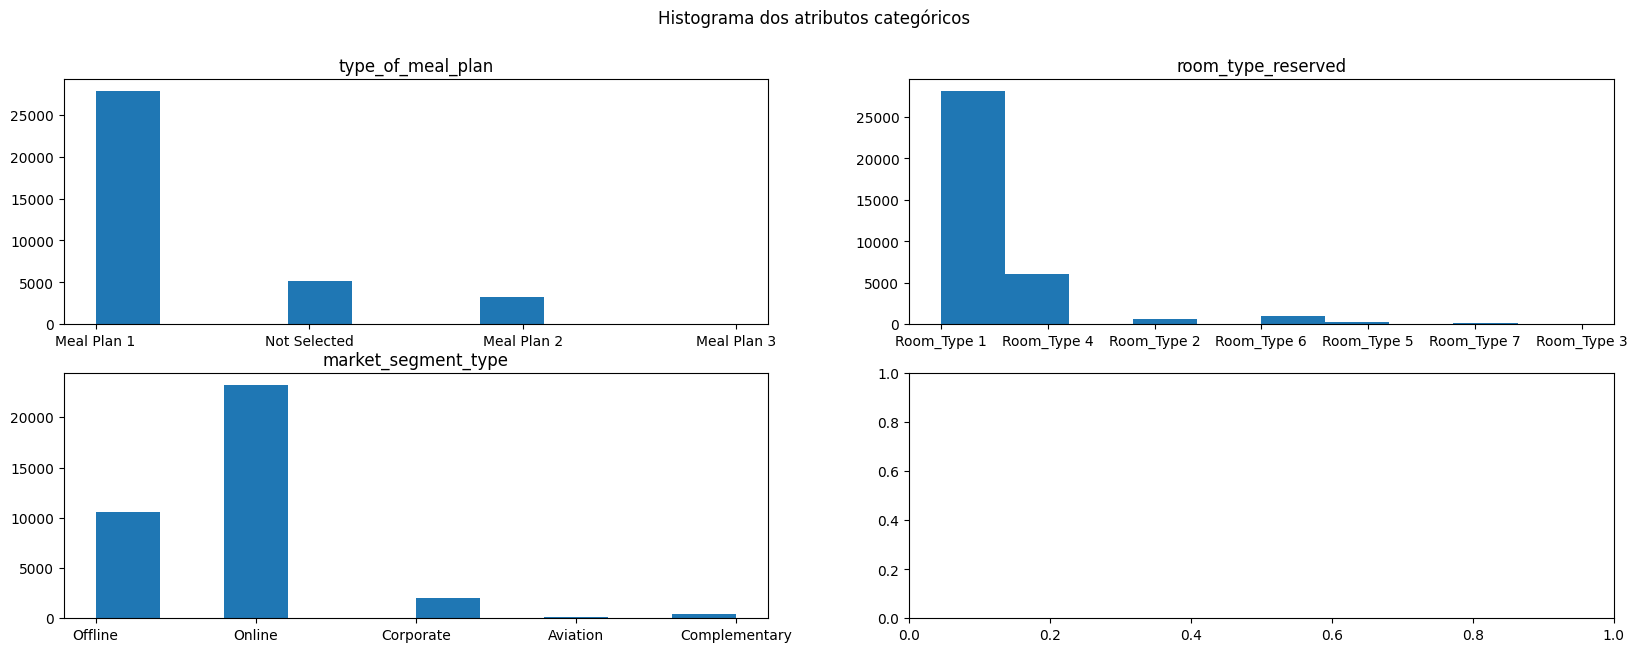

In [ ]:
lin = math.ceil(math.sqrt(len(categ)))
col = math.ceil(math.sqrt(len(categ)))

fig, axs = plt.subplots(lin, col, figsize=(20, 7))
axs = axs.ravel() 
fig.suptitle('Histograma dos atributos categóricos')
for i, col in enumerate(categ):
    axs[i].hist(data[col])
    axs[i].set_title(col)

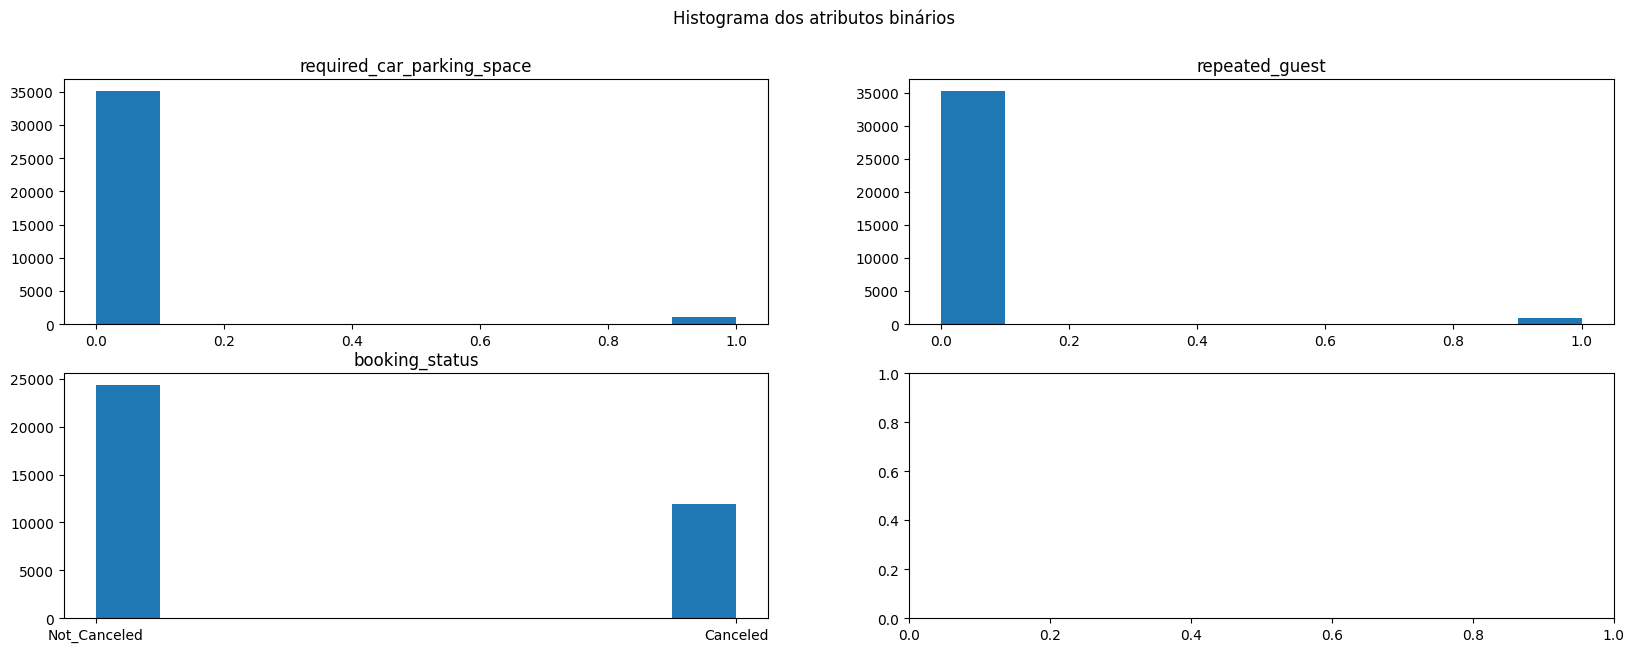

In [ ]:
lin = math.ceil(math.sqrt(len(bin_vars + target)))
col = math.ceil(math.sqrt(len(bin_vars + target)))

fig, axs = plt.subplots(lin, col, figsize=(20, 7))
axs = axs.ravel() 
fig.suptitle('Histograma dos atributos binários')
for i, col in enumerate(bin_vars + target):
    axs[i].hist(data[col])
    axs[i].set_title(col)

In [ ]:
(unique, counts) = np.unique(data[target], return_counts=True)
for label, count in zip(unique, counts):
  print(label, ':', count)

Canceled : 11885
Not_Canceled : 24390


Os dados categóricos possuem muito desbalanceamento, com grande maioria dos atributos possuindo valores discrepantes entre a quantidade de elementos em algumas classes. Os valores alvo possuem uma classe (Not_Canceled) com o dobro de elementos da outra (Canceled) portanto será utilizado o SMOTE para gerar mais exemplos da classe menos presente.


### Normalização dos dados quantitaivos

Será aplicada a normalização min-max nas colunas quantitativas de forma que os valores ficarão entre 0 e 1.

In [ ]:
# aplica normalização min-max nas colunas
for col in quant:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min()) 

data.head(15)  
  

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.50,0.0,0.142857,0.117647,Meal Plan 1,0,Room_Type 1,0.505643,0.818182,0.033333,Offline,0,0.0,0.0,0.120370,0.0,Not_Canceled
1,0.50,0.0,0.285714,0.176471,Not Selected,0,Room_Type 1,0.011287,0.909091,0.166667,Online,0,0.0,0.0,0.197556,0.2,Not_Canceled
2,0.25,0.0,0.285714,0.058824,Meal Plan 1,0,Room_Type 1,0.002257,0.090909,0.900000,Online,0,0.0,0.0,0.111111,0.0,Canceled
3,0.50,0.0,0.000000,0.117647,Meal Plan 1,0,Room_Type 1,0.476298,0.363636,0.633333,Online,0,0.0,0.0,0.185185,0.0,Canceled
4,0.50,0.0,0.142857,0.058824,Not Selected,0,Room_Type 1,0.108352,0.272727,0.333333,Online,0,0.0,0.0,0.175000,0.0,Canceled
5,0.50,0.0,0.000000,0.117647,Meal Plan 2,0,Room_Type 1,0.781038,0.727273,0.400000,Online,0,0.0,0.0,0.212963,0.2,Canceled
6,0.50,0.0,0.142857,0.176471,Meal Plan 1,0,Room_Type 1,0.076749,0.818182,0.466667,Online,0,0.0,0.0,0.199167,0.2,Not_Canceled
7,0.50,0.0,0.142857,0.176471,Meal Plan 1,0,Room_Type 4,0.187359,1.000000,0.833333,Online,0,0.0,0.0,0.195574,0.2,Not_Canceled
8,0.75,0.0,0.000000,0.235294,Meal Plan 1,0,Room_Type 1,0.273138,0.545455,0.166667,Offline,0,0.0,0.0,0.179444,0.2,Not_Canceled
9,0.50,0.0,0.000000,0.294118,Meal Plan 1,0,Room_Type 4,0.099323,0.818182,0.566667,Online,0,0.0,0.0,0.247111,0.6,Not_Canceled


### Codificação dos  dados categóricos



Os dados categóricos assumem valores de strings que podem variar entre valores definidos. Essa forma de representação não é facilmente aplicável em algoritimos de classificação, onde dados numéricos são preferíveis, portanto uma forma de solucionar esta questão é transformar cada categori em uma coluna e o seu valor assume 0 nas entradas que não pertencem àquela classe e 1 para as que pertencem. Dessa forma eles assumem valores numéricos que mantêm a semantica alterando apenas a forma de representação dessas informações.



In [ ]:
for col in categ + target:
  dummy_vars = pd.get_dummies(data[col])
  data = pd.concat([data, dummy_vars], axis=1, sort=False)
  data = data.drop(columns=[col])

# A coluna complementar á coluna alvo é descartada
data = data.drop(columns=['Not_Canceled'])
data.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
required_car_parking_space                 2
lead_time                                352
arrival_month                             12
arrival_date                              31
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
Meal Plan 1                                2
Meal Plan 2                                2
Meal Plan 3                                2
Not Selected                               2
Room_Type 1                                2
Room_Type 2                                2
Room_Type 3                                2
Room_Type 4                                2
Room_Type 5                                2
Room_Type 

In [ ]:
target = ['Canceled']
categ = [item for item in [*data.columns] if item not in target and item not in quant]

### Correlação entre atributos categóricos

In [ ]:
corr = data[categ].corr()

matrizSuperior = np.triu(np.ones(corr.shape), k=1).astype(bool)
correlacaoSuperior = corr.where(matrizSuperior)

atributos = [col for col in correlacaoSuperior.columns if any(abs(correlacaoSuperior[col]) >= max_corr)]
print("Atributos categóricos com alta correlação:")
print(atributos)

categ = [col for col in categ if col not in atributos]
data = data.drop(columns=atributos)

Atributos categóricos com alta correlação:
['Room_Type 4', 'Online']


O atributo **Room_Type 4** possui uma correlação de -0.832023 com o atributo **Room_Type 1** e o atributo **Online** possui uma correlação de 0.852504 com o atributo **Offline** portanto **Room_Type 4** e **Online** serão removidos. Os demais atributos categóricos possuem uma correlação abaixo da correlação máxima estipulada de 0.8

In [ ]:
kf = KFold(n_splits=20, shuffle=True)

In [ ]:
X = data[categ + quant]
y = data[target].to_numpy().reshape((len(data), ))

# Geração de entradas para a classe menos dominante
smote_enn = SMOTEENN(random_state=42)
X_r, y_r = smote_enn.fit_resample(X, y)

(unique, counts) = np.unique(y_r, return_counts=True)
print(counts)

[17853 19602]


---
## **2. Descrição das técnicas utilizadas**

A tarefa pode ser abordada como um problema de classificação, onde a partir das informações de uma determinada reserva um algoritimo é treinado para definir se aquela reserva será ou não cancelada. A classe de saída é interpretada como tendo o valor **0 para as reservas não canceladas** e **1 para as reservas canceladas**. Os dados possuem tanto atributos quantitativos quanto categóricos (transformados em classes binárias). Apesar de ter sido realizado um balanceamento na quantidade dos atributos alvo, os demais atributos categóricos possuem uma certa quantidade de desbalanceamento que podem interferir negativamente nos algoritimos selecionados.

**1. KNN** - O algorítimo de K-Nearest Kneighbour foi escolhido pois é uma técnica simples porém eficaz de classificação que classifica os dados em conjuntos baseados na distância entre os atributos e os centróides escolhidos aleatoriamente e atualizados a cada iteração. O número de conjuntos k nos quais os dados serão separados é um parâmetro importante pois define a qualidade agrupamento que será realizado. Serão testados diferentes valors de k, sendo eles 1, 2, 3, 11 e 20.

In [ ]:
k_values = [1, 2, 3, 11, 20]
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=kf)
  scores_b = cross_val_score(knn, X_r, y_r, cv=kf)
  print('Dados desbalanceados - Acurácia com', k, 'K-NN: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))
  print('Dados balanceados - Acurácia com', k, 'K-NN: %0.4f +/- %0.4f' % (scores_b.mean(), scores_b.std()))
  print('------------------------------')

Dados desbalanceados - Acurácia com 1 K-NN: 0.8544 +/- 0.0082
Dados balanceados - Acurácia com 1 K-NN: 0.9957 +/- 0.0019
------------------------------
Dados desbalanceados - Acurácia com 2 K-NN: 0.8556 +/- 0.0072
Dados balanceados - Acurácia com 2 K-NN: 0.9934 +/- 0.0015
------------------------------
Dados desbalanceados - Acurácia com 3 K-NN: 0.8532 +/- 0.0077
Dados balanceados - Acurácia com 3 K-NN: 0.9893 +/- 0.0026
------------------------------
Dados desbalanceados - Acurácia com 11 K-NN: 0.8455 +/- 0.0069
Dados balanceados - Acurácia com 11 K-NN: 0.9530 +/- 0.0050
------------------------------
Dados desbalanceados - Acurácia com 20 K-NN: 0.8423 +/- 0.0059
Dados balanceados - Acurácia com 20 K-NN: 0.9333 +/- 0.0079
------------------------------


**2. Máquina de Vetores de Suporte com polinômio de grau N** - Essa técnica consiste em separar os pontos que pertencem à classes diferentes encontrando os hiperparâmetros que melhor descrevem um hiperplano de grau N separando os dados. A separação pode ser linear ou não linear. Devido à quantidade de atributos sendo avaliados à fim de determinar se uma reserva será cancelada, foi escolhida a máquina que descreve separações não lineares, dando um poder maior de representação desse domínio mais complexo da aplicação, que talvez fosse prejudicado por uma separação linear. Apesar disso o grau 1 foi utilizado testando também a possibilidade linear. Os graus sendo testados serão 1, 2 e 5

In [ ]:
degree = [1, 2, 5]
for deg in degree:
  svm = SVC(kernel='poly', degree=deg)
  scores = cross_val_score(svm, X, y, cv=kf)
  scores_b = cross_val_score(svm, X_r, y_r, cv=kf)
  print('Dados desbalanceados - Acurácia com SVM Poly grau ', deg, ': %0.4f +/- %0.4f' % (scores.mean(), scores.std()))
  print('Dados balanceados - Acurácia com SVM Poly grau ', deg, ': %0.4f +/- %0.4f' % (scores_b.mean(), scores_b.std()))
  print('------------------------------')

Dados desbalanceados - Acurácia com SVM Poly grau  1 : 0.8003 +/- 0.0102
Dados balanceados - Acurácia com SVM Poly grau  1 : 0.8412 +/- 0.0083
------------------------------
Dados desbalanceados - Acurácia com SVM Poly grau  2 : 0.8129 +/- 0.0100
Dados balanceados - Acurácia com SVM Poly grau  2 : 0.8690 +/- 0.0077
------------------------------
Dados desbalanceados - Acurácia com SVM Poly grau  5 : 0.8285 +/- 0.0079
Dados balanceados - Acurácia com SVM Poly grau  5 : 0.8955 +/- 0.0072
------------------------------


**3. Random Forest** - É um método de Bagging baseado em árvores de decisão que se utiliza de N árvores em paralelo treinadas com sunconjuntos do conjunto de treino, facilitando a identificaçõa de relacionamentos entre as variáveis. Os números de árvores na forest para cada teste foi definido como 10, 20,50 e 100, o critério de avaliaçõ do split foi o Gini para todos os testes e a profundidade máxima foi definida como sendo metade do número de atributos dos dados de entrada.

In [ ]:
estimators = [10, 20, 50 ,100]
for n_e in estimators:
  rf = RandomForestClassifier(n_estimators=n_e, criterion='gini', max_depth=int(len(X_r.columns)/2))
  scores = cross_val_score(rf, X, y, cv=kf)
  scores_b = cross_val_score(rf, X_r, y_r, cv=kf)
  print('Dados desbalanceados - Acurácia Random Forest', n_e, 'estimadores: %0.4f +/- %0.4f' % (scores.mean(), scores.std())) 
  print('Dados balanceados - Acurácia Random Forest', n_e, 'estimadores: %0.4f +/- %0.4f' % (scores_b.mean(), scores_b.std()))
  print('------------------------------')

Dados desbalanceados - Acurácia Random Forest 10 estimadores: 0.8774 +/- 0.0052
Dados balanceados - Acurácia Random Forest 10 estimadores: 0.9504 +/- 0.0068
------------------------------
Dados desbalanceados - Acurácia Random Forest 20 estimadores: 0.8813 +/- 0.0071
Dados balanceados - Acurácia Random Forest 20 estimadores: 0.9552 +/- 0.0063
------------------------------
Dados desbalanceados - Acurácia Random Forest 50 estimadores: 0.8828 +/- 0.0073
Dados balanceados - Acurácia Random Forest 50 estimadores: 0.9561 +/- 0.0036
------------------------------
Dados desbalanceados - Acurácia Random Forest 100 estimadores: 0.8817 +/- 0.0059
Dados balanceados - Acurácia Random Forest 100 estimadores: 0.9557 +/- 0.0050
------------------------------


**4. Multi-layer Perceptron (MLP)** - É uma técnica que consiste em acplar sequencialmente conjuntos de Perceptorns a fim de criar um aproximadpr de funções não linear. Através de operações com paramêtros ajustáveis chamados pesos e bias os dados de entrada são transformados em uma saída que é uma predição do atributo alvo, em seguida o erro entre o valor real e apredição é calculado e à partir desse erro é calculado o gradiente negativo (pois o objetivo é reduzir o erro) para cada parãmetro ajustávele os ajustes são aplicados. O modelo escolhido é um modelo simples com 3 camadas, sendo a primeira e a ultima as camas de entrada e saída respectivamente, portanto o número de elementos em cada uma é o número de atributos de entrada ou o número de atributos sendo classificados e número de elementos na camada oculta de cada modelo de teste foi respectivamente 10, 20, 50 e 100

In [ ]:
hidden_units = [10, 20, 50 ,100]
for h_u in hidden_units:
  mlp = MLPClassifier(h_u, max_iter=1000)
  scores = cross_val_score(mlp, X, y, cv=kf)
  scores_b = cross_val_score(mlp, X_r, y_r, cv=kf)
  print('Dados desbalanceados - Acurácia MLP', h_u, 'hidden units: %0.4f +/- %0.4f' % (scores.mean(), scores.std())) 
  print('Dados balanceados - Acurácia MLP', h_u, 'hidden units: %0.4f +/- %0.4f' % (scores_b.mean(), scores_b.std()))
  print('------------------------------')

Dados desbalanceados - Acurácia MLP 10 hidden units: 0.8188 +/- 0.0157
Dados balanceados - Acurácia MLP 10 hidden units: 0.8773 +/- 0.0129
------------------------------
Dados desbalanceados - Acurácia MLP 20 hidden units: 0.8261 +/- 0.0104
Dados balanceados - Acurácia MLP 20 hidden units: 0.8917 +/- 0.0083
------------------------------
Dados desbalanceados - Acurácia MLP 50 hidden units: 0.8426 +/- 0.0090
Dados balanceados - Acurácia MLP 50 hidden units: 0.9125 +/- 0.0074
------------------------------
Dados desbalanceados - Acurácia MLP 100 hidden units: 0.8495 +/- 0.0066
Dados balanceados - Acurácia MLP 100 hidden units: 0.9271 +/- 0.0064
------------------------------


---
## **3. Interpretação dos resultados obtidos**

Dentre os métodos utlizados para analisar os dados de reservas de hospedagem e prever a possibilidade de cancelamento da reserva, o que obteve a maior acurácia calculada por cross_validation foi o KNN com número de vizinhos igual a 1, apresentando 99% de acurácia seguido pelo KNN com k = 2. A técnica de Random Forest obteve 95 % de acurácia e o MLP obteve, na sua melhor versão, 92% de acurácia e por fim a técnica de SVM obteve acuracias inferiores à 80%. 

O método de KNN pode ter sido mais efetivo pois é menos afetado pela grande quantidade de atributos e pelo desbalanceamento de alguns atributos categóricos, uma vez que não há treinamento e o algoritimo se ajusta aos dados, a esparsidade não afeta tão significativamente o resultado final pois estes não contribuem de forma significativa com a distância entre os dados. Os métodos de Random Forest e MLP alcançaram resultados próximos O método de SVM pode ter obtido os piores resultados por conta do grau baixo da função responsável por gerar o hiperplano, com o aumento do grau é possível observar que a acuracia aumentou porém o tempo necessário e o espaço necessário também aumentam deixando o algoritimo significativamente mais lento que os demais.

---
##  **4. Conclusão**

Os resultados obtidos experimentando diferentes configurações dos métodos de KNN, SVM e Random Forest permitem concluir que apesar de ser mais símples o método do KNN se mostrou mais efetivo, mostrando que a complexidade do método não está diretamente relacionado à sua eficácia. Outra observação importante é o efeito do balanceamento dos dados, que melhoraram significativamente a acurácia de todos os métodos, provavelmente devido ao overfitting que pode ocorrer com o favorecimento da predição em direção à classe dominante.

---
## **5. Apêndice (descrição das técnicas de Classificação apresentadas pelos colegas durante os seminários)**

### **1. Novo método de detecção de água envenenada usando tecnologia Wi-Fi incorporada a smartphone e algoritimos de aprendizado de máquina.**

* **Descrição:** Amostras de água foram submetidas a um sinal Wi-Fi e o comportamento do sinal foi observado a fim de medir, através das características do sinal recebido, se a água está contaminada ou não.

* **Pipeline do experimento:** Roteador -> Transmite sinal Wi-Fi através da amostra de água -> Smartphone recebe sinal -> Remoção de ruído do sinal -> Extração de CSI (Channel-State-Information) do sinal limpo de ruído -> Seleção de features a serem analisadas -> Alimentação do algoritimo de classificação -> Classificação de amostras entre contaminada ou não contaminada.

* **Algoritimos utilizados:**
  * **SVM** - kernel Linear e Gausiano apresentaram os melhores resutados.
  * **KNN** - k=1 foi a melhor opção.
  * **LSTM** - Dados foram normalizados através do z-score, duas camadas ocultas com 200 e 100 nós, dropout e softmax nas camadas.
  * **Ensembles** - utilizado o AdaBoost realizado de forma sequencial e com 30 iterações.

* **Métricas de avaliação:**
  * **AUC** - Área abaixo da curva ROC
  * **TPR** - taxa de posotivos verdadeiros
  * **TNR** - taxa de negativo verdadeiro
  * **F1-Score** - Combinação de precisão e TPR
  * **Acurácia** - Quantidade de acertos sobre o número total de predições

* **Resultados:**
  * água contaminada com 100mg/l e água limpa - pior método foi o KNN e o melhor foi o LSTM.
  * água contaminada com 1000mg/l e água limpa - taxa de acerto de 100% para todos os algoritimos.
  * água conatminada com 100mg/l, água contaminada com 1000mg/l e água limpa - AdaBoost obteve a maior acurácia e KNN obteve a pior.


* **Conclusão:**
  * Houve pouca diversidade em relação à toxina e às quantidades diluídas.
  * Os hiperparâmetros das redes não foram divulgados.
  * O experimento onde todos os modelos obtiveram 100% de acurácia deve ser mais analisado pois esse resultado distoa da prática encontrada na área.


### **2. Predição da Recidiva de Câncer usando técnicas de aprendizado de máquina.**

* **Objetivo:** Realizar a predição da possibilidade de Recidiva de Cãncer à partir de features binárias relacionadas principalmente à presença de determinados tratamentos.

* Dataset muito desbalanceado - Apenas 9% das instância possuiam o rótulo de recidiva positiva.

* Para lidar com o desbalancemento foi utilizado K-Fold durante treino/teste, a fim de remover viés de sorte e SMOTE para realizar a geração de dados sintéticos para a classe com menos rótulos a fim de balancear os dados e evitar overfitting.

* **Modelos utilizados:**
  * Naive Bayes com BernoulliNB pois os atributos são binários e a distribuição de Bernoulli é utilizada para modelar problemas em que a resposta é binária.
  * SVM para encontrar fronteiras de decisão que melhor sepra as classes.

* **Resultados:**
  * O modelo Naive Bayes sofreu overfitting com os dados desbalanceados e houve um decrescimento das métricas ao ser ajustado com os dados balanceados.
  * O SVM apresentou um resultado melhor que o método de Naive Bayes porém também houve uma queda nas métricas com os dados balanceados. Além disso esse modelo possui pouca explicabilidade em relação ao resultado da classificação.

* **Conclusão:**
  * Trabalhos da área de saúde geralmente possuem um alto desbalanceamento, uma vez que medições saudáveis são mais abundantes que medições com não saudáveis.
  * O uso da sobreamostragem se provou bastante vantajoso nesse caso pois previniu o overfitting do modelo.


### **3. CatBoost**
* A maioria dos algoritmos de ML trabalha melhor com atributos numéricos, portanto, a solução solução mais comum é transformar cada uma das colunas categóricas em uma colunas binárias para cada classe daquela categoria, indicando o pertencimento ou não da entrada àquela classe, porém para um número muito extenso de dados essa abordagem pode aumentar muito a dimensão e a disperssão dos dados.

* CatBoosting (Categorical Boosting) é uma técnica que lida com atributos categóricos sem pré-processamento. Ensemble do tipo Boosting onde os modelos utilizados são árvores de decisão.

* **Modelos utilizados para comparação:**
  * KNN
  * Random Forest
  * Naive Bayes
  * SVM
  * CatBoost

* Vantagens: 
  * Maior desempenho com dados desbalanceados ou com alta dimensionalidade.
  * Lida bem com dados categóricos
  * Maior velocidade de treinamento 

* Desvantagens:
  * Baixa interpretabilidade - Black Box
  * Seleção de hiperparametros pode ser complexa